<a href="https://colab.research.google.com/github/Giridhar57/ML_Repo/blob/main/Giridhar_Kolli_Project_1_Techbairn_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Assignment 1 is primarily focused on the Linear Regression algorithm. Before starting, make sure that the *slr02.xls* file and this notebook is in the same folder, if you are using Jupyter labs.

You have five tasks below. Each of them are graded separately. Complete the functions and produce predictions. 

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# loading data
# You can use your own data if you want, but it should have only one input and one output feature.
data = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr02.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [ ]:
# Run this cell as an example
# visualise the imported data
## write code here

data

## end

,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998
5,15.500000,75.199997
6,14.700000,69.699997
7,17.100000,82.000000
8,15.400000,69.400002
9,16.200001,83.300003


### Task 1: Check the type of data

Expected output:

*pandas.core.frame.DataFrame*

In [ ]:
# Task : Check the type of data
## write code here
type(data)
## end

pandas.core.frame.DataFrame

In [ ]:
# We cast numpy array for calulations
X = np.array(data.X)
y = np.array(data.Y)

In [ ]:
# visualise casted data
X,y

(array([20.        , 16.        , 19.79999924, 18.39999962, 17.10000038,
        15.5       , 14.69999981, 17.10000038, 15.39999962, 16.20000076,
        15.        , 17.20000076, 16.        , 17.        , 14.39999962]),
 array([88.59999847, 71.59999847, 93.30000305, 84.30000305, 80.59999847,
        75.19999695, 69.69999695, 82.        , 69.40000153, 83.30000305,
        79.59999847, 82.59999847, 80.59999847, 83.5       , 76.30000305]))

In [ ]:
type(X)

numpy.ndarray

### Task 2: Define plot points function

In [ ]:
def plot_points(X, y, xlabel, ylabel):
    plt.scatter(X,y,color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # TODO: Code for scatter plotting X and y and label the axes.

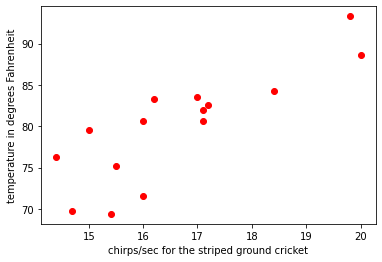

In [ ]:
# plot data points
plot_points(X, y, "chirps/sec for the striped ground cricket", "temperature in degrees Fahrenheit")

### Task 3: Define Hypothesis

In [ ]:
# initialised theta
np.random.seed(2)
theta=np.random.rand(2,1)
# hypothesis of model
def hypothesis(X, theta):
    return theta[0]+theta[1]*X
    """Predicts output feature given input feature and theta"""

In [ ]:
# plots line of regression
def draw_line(theta):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals =np.array(axes.get_xlim())
    y_vals = hypothesis(x_vals, theta)
    plt.plot(x_vals, y_vals, '--')

In [ ]:
# plots points and lines
def draw_points_and_lines(X, y, xlabel, ylabel, theta):
    """Draw lines and points"""
    plot_points(X, y, xlabel, ylabel)
    draw_line(theta)

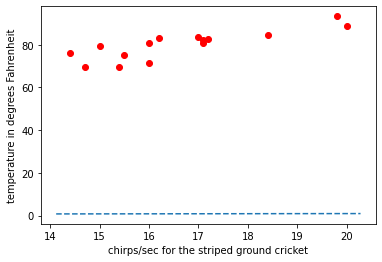

In [ ]:
# draw line of regression without traing model
draw_points_and_lines(X, y, "chirps/sec for the striped ground cricket", "temperature in degrees Fahrenheit", theta)

### Task 4: Define the return statement of cost function

In [ ]:
# cost function
m = len(X)
def cost(X, y, theta):
    m=X.size
    cost=0
    y_pred=X*theta[1]+theta[0]
    cost=(1/(2*m))*(y_pred-y)**2
    return cost
    # TODO: Cost function with Mean Squared Error

In [ ]:
# initial cost without training model
cost(X, y, theta)

array([256.0576659 , 166.84823389, 284.28820079, 231.7795338 ,
       211.84614757, 184.32428922, 158.16173483, 219.35208458,
       156.70413124, 226.56712197, 206.85059899, 222.59477835,
       211.9977442 , 227.55343179, 189.96137735])

### Task 5: Define the gradient descent function

In [ ]:
# minimize cost
def gradient_descent(X, y, theta, alpha, steps):
    n=float(len(X))
    for i in range(steps):
        y_pred=X*theta[1]+theta[0]
        theta0=-(2/n)*sum(y-y_pred)
        theta1=-(2/n)*sum(X*(y-y_pred))
        theta[0]=theta[0]-(alpha*theta0)
        theta[1]=theta[1]-(alpha*theta1)
    return theta
    # TODO: Code for Gradient Descent

In [ ]:
# train model of 100 iterations
theta=gradient_descent(X, y, theta, alpha=0.0001, steps=100000)
theta

array([[5.00813414],
       [4.49383217]])

In [ ]:
# cost after traing model
cost(X, y, theta)

array([1.31661491e+00, 9.39675435e-01, 1.56867435e-02, 3.84119644e-01,
       5.23058575e-02, 9.62892597e-03, 6.23324004e-02, 7.23577760e-04,
       7.72212572e-01, 1.00532319e+00, 1.72051140e+00, 2.95909303e-03,
       4.54005223e-01, 1.46541020e-01, 1.44351489e+00])

In [ ]:
# value of theta after training 
type(theta)

numpy.ndarray

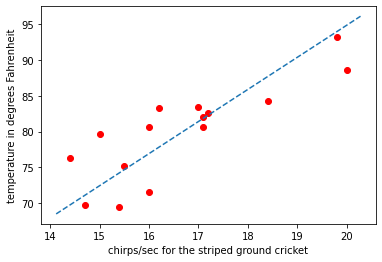

In [ ]:
# regression line after traing model
draw_points_and_lines(X, y, "chirps/sec for the striped ground cricket", "temperature in degrees Fahrenheit", theta)

In [ ]:
#To find the R^2 value

mean_x=np.mean(X)
mean_y=np.mean(y)
ss_t=0
ss_r=0
m=float(theta[1])
c=float(theta[0])
for i in range(len(X)):
    y_pred=m*X[i]+c
    ss_t+=(y[i]-mean_y)**2
    ss_r+=(y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print("R^2=",r2)

R^2= 0.6034132922769024


### Task 6: predict by using hypothesis function

In [ ]:
# Predict
# TODO: Prediction using trained model
print("When chirps/sec is 16.0, the temperature is ",float(theta[0]+theta[1]*16.0))

When chirps/sec is 16.0, the temperature is  76.90944882207225


In [ ]:
print("When chirps/sec is 19.8, the temperature is ",float(theta[0]+theta[1]*19.8))

When chirps/sec is 19.8, the temperature is  93.98601105975237
